# <center> <u> Gradient Boosting </u> </center> 

In [1]:
import numpy as np
from numba import jit, prange

import seaborn as sns 
import matplotlib.pyplot as plt 

## <center> Generate Synthetic Data </center> 

In [2]:
@jit(nopython = True, parallel = True)
def compute_cholesky_decomposition(p):
    """
    
    """
    
    N = 10000
    x1 = np.zeros(N)
    x2 = np.zeros(N)
    
    z1 = np.random.normal(0, 1, N)
    z2 = np.random.normal(0, 1, N)
    
    x1 = z1
    
    for i in prange(N):
        x2[i] = p * z1[i] + np.sqrt(1 - p**2) * z2[i]
    
    
    return x1, x2

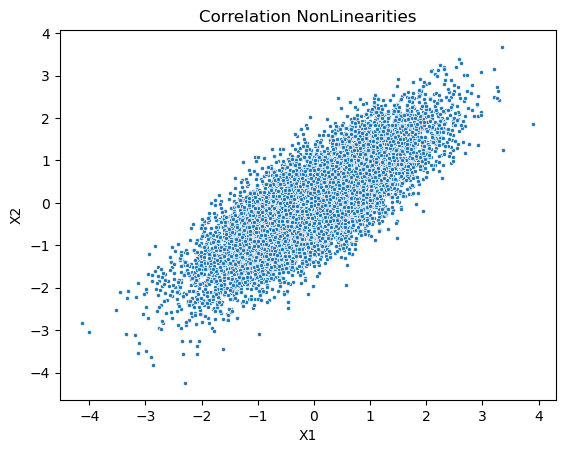

In [3]:
X, y = compute_cholesky_decomposition(0.8)
    
ax = sns.scatterplot(
    x = X,
    y = y,
    marker = ".",
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> <u> Informal Introduction </u> </center> 

## <u> Minimize Mean Squared Error </u>

## <center> $ L_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y_{i}} - y_{i})^{2} $ </center>

## <u> Boosted Estimator </u> 

## <center> $ F_{m+1}(x_{i}) = F_{m}(x_{i}) + h_{m}(x_{i}) = y_{i} $ </center> 

## <center> $ h_{m}(x_{i}) = y_{i} - F_{m}(x_{i}) $ </center>

## <u> Gradient </u> 

## <center> $ -\frac{\partial L_{MSE}}{\partial F(x_{i})} = \frac{2}{N} (y_{i} - F(x_{i})) = \frac{2}{N} h_{m}(x_{i}) $ </center>

In [4]:
@jit(nopython = True)
def loss_func(y_hat, y):
    """
    
    """
    
    return np.mean((y_hat - y)**2)

In [5]:
@jit(nopython = True)
def gradient(y, pred):
    """
    
    """
    
    
    return (2 / len(y)) * (y - pred)

In [8]:
@jit(nopython = True)
def gradient_boosting_intro(X, y):
    """
    
    """
    
    beta = 0.5
    F = beta * X
    nabla = []
    
    for i in range(100):
    
        # Compute Psuedo Residuals 
        r = -gradient(y, F)
        nabla.append(np.sum(r))

        h = y - F        
        F_m = F + h
        F = F_m
    
    return F_m

In [9]:
boosted_pred = gradient_boosting_intro(X, y)

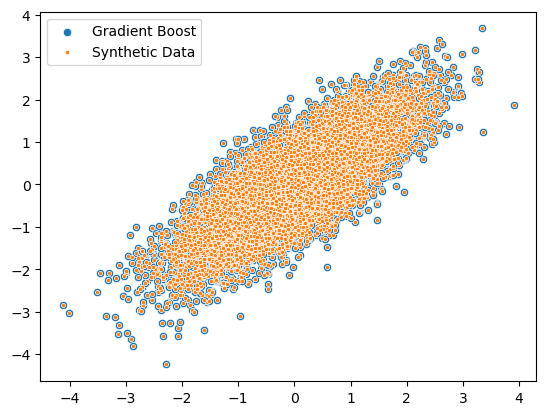

In [12]:
ax = sns.scatterplot(
    x = X,
    y = boosted_pred,
    label = "Gradient Boost"
)

sns.scatterplot(
    x = X,
    y = y,
    label = "Synthetic Data",
    marker = "."
)

plt.show()

## <u> Objective Function </u> 

## <center> $ F(x) = \arg \min \sum_{i=1}^{N} L(y_{i}, \gamma) $ </center>

## <u> Compute Psuedo Residuals </u> 

## <center> $ r = -[\frac{\partial L(y_{i}, F(x_{i}))}{\partial F(x_{i})}] $ </center>

## <u> Fit Weak Learner </u>

## <center> $ \gamma = \arg \min \sum_{i=1}^{N} L(y_{i}, F_{m-1}(x_{i}) + \gamma h_{m}(X_{i})) $ </center>

## <u> Update Model </u> 

## <center> $ F_{m+1} = \gamma h_{m}(x_{i}) + F_{m}(x) $ </center>